In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA


In [3]:
df =pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
num = ["age","trestbps","chol","thalach","oldpeak"]

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


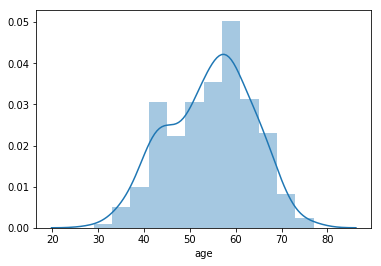

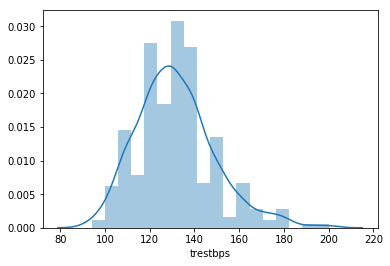

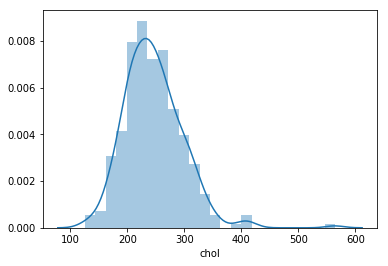

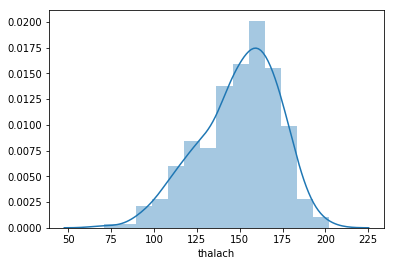

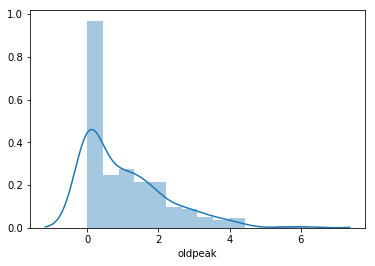

In [7]:
for col in num:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

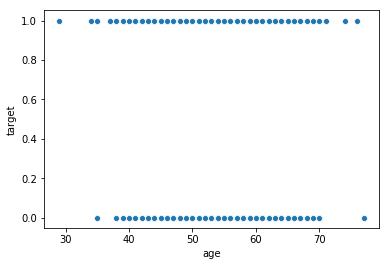

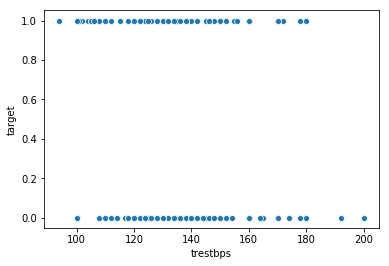

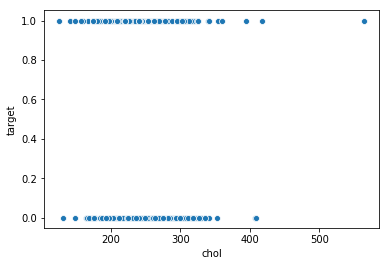

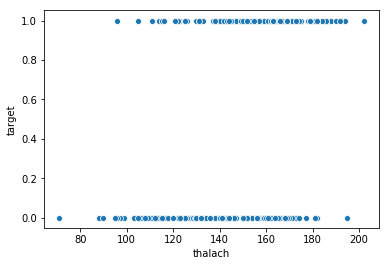

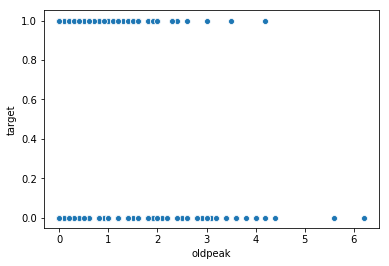

In [8]:
for col in num:
    plt.figure()
    sns.scatterplot(data=df,x=col,y="target")
    plt.show()

In [9]:
cat = ["sex","cp","fbs","exang","restecg","slope","ca","thal"]

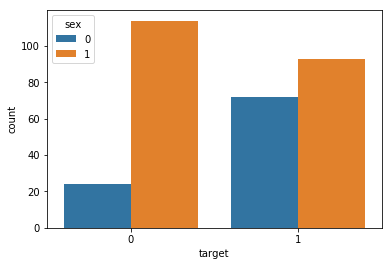

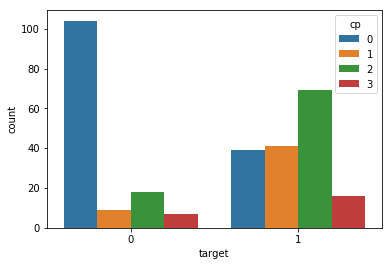

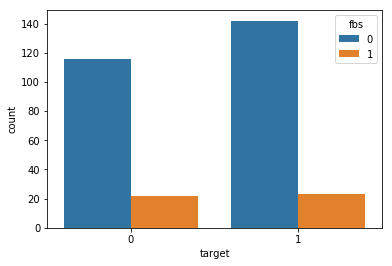

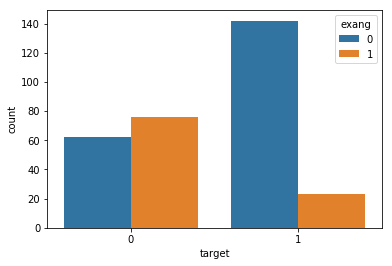

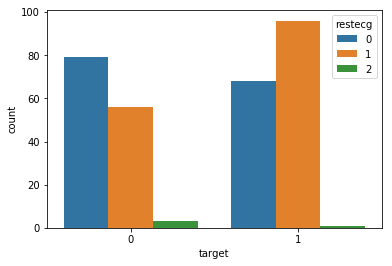

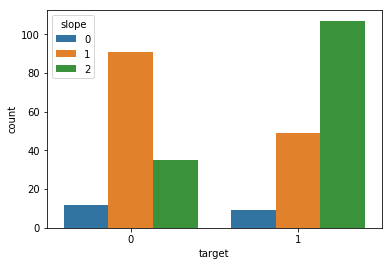

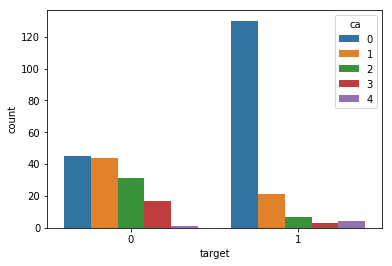

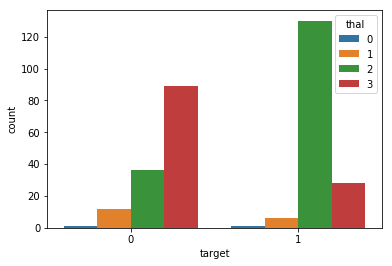

In [11]:
for col in cat:
    plt.figure()
    sns.countplot(data=df,x="target",hue=col)
    plt.show()

In [12]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
lr = LogisticRegression(random_state=1)

In [21]:
classify(lr)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
dt = DecisionTreeClassifier()

In [47]:
dt = classify(dt)

              precision    recall  f1-score   support

           0       0.66      0.76      0.70        41
           1       0.77      0.68      0.72        50

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



In [25]:
dt.feature_importances_

array([0.07766313, 0.01713481, 0.32725145, 0.08980295, 0.09175021,
       0.        , 0.        , 0.05840245, 0.11895301, 0.06844208,
       0.        , 0.11616361, 0.03443628])

In [32]:
def feature_test(criteria,count,model):
    test = SelectKBest(score_func=criteria,k=count)
    X_train_new = test.fit_transform(X_train,y_train)
    X_test_new = test.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred = model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(test.get_support())
    return model

In [37]:
feature_test(f_regression,8,lr)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[False  True  True False False False False  True  True  True  True  True
  True]


C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)